In [43]:
from hough_transform import blank_ruled_paper, handwritten_paper

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [44]:
# image, truth = blank_ruled_paper("hough_by_open_cv", return_truth=True)
image, truth = handwritten_paper("test_blank_ruled_paper", "Anirudh Sharma", "MT2025732", return_gt=True)

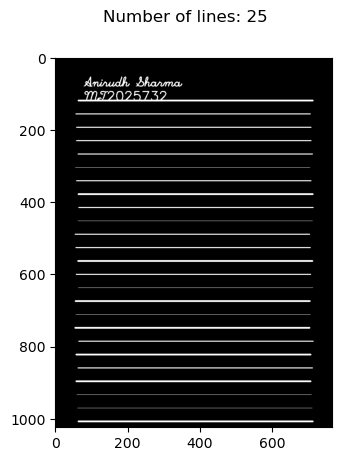

In [45]:
fig, ax = plt.subplots(1, 1)
plt.suptitle(f"Number of lines: {truth}")
ax.imshow(image, cmap="gray_r")
plt.show()

Minimum Line Length: 558


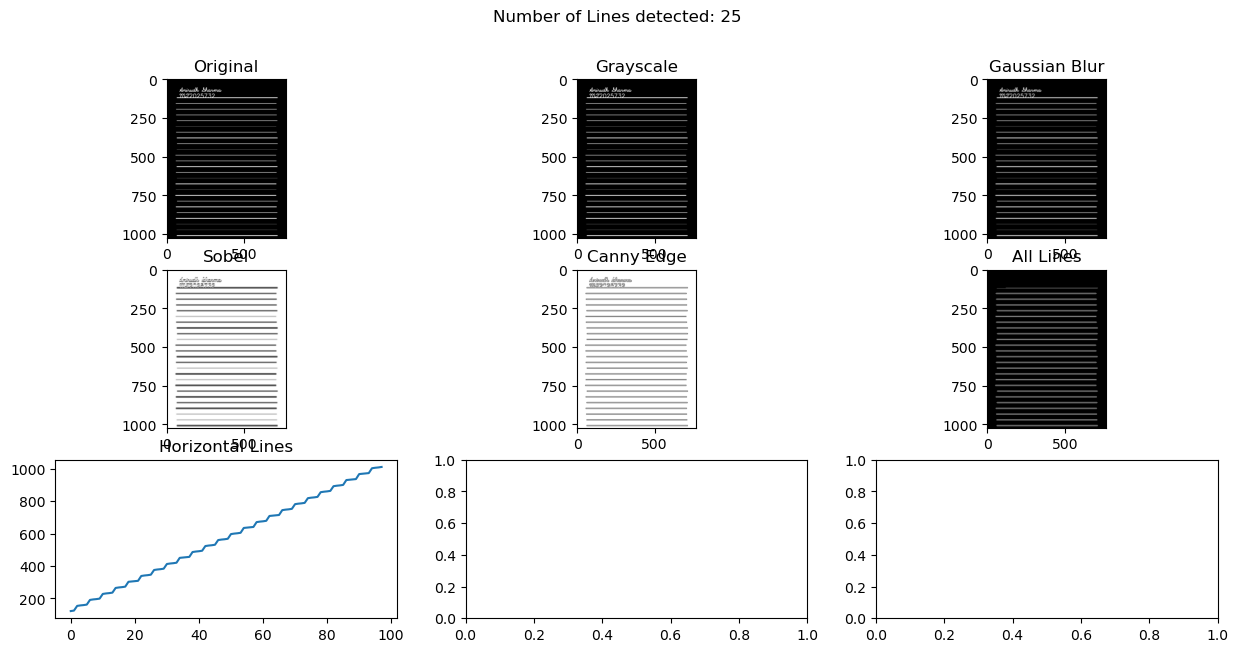

In [131]:
assert image.min() >= 0
assert image.max() <= 255

# Grayscale-ize
if image.ndim != 2:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray = image

# Canny Edge Detection
blur = cv2.GaussianBlur(gray, (7, 7), 1.5)

# Specifically calculating the gradients along y-axis
sobel = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)
sobel = np.abs(sobel)
sobel = np.uint8(255 * sobel / sobel.max())

# Canny Edge Detection
edges = cv2.Canny(sobel, 75, 255)


width = image.shape[1]
minLineLength = max(10, width - (110 + 100))
print(f"Minimum Line Length: {minLineLength}")
# Hough Transform
lines = cv2.HoughLinesP(
    # Input Image to perform Hough Transform on
    image=edges,
    # distance resolution in pixels. 1 => Check on exery pixel
    rho=1,
    # angle resolution in radians. np.pi / 180 => Check on exery degree
    theta=np.pi / 180,
    # How many edge pixels should agree on each combo being a line?
    threshold=minLineLength,
    # Output variable, ignorable
    lines=None,
    # The shortest line I care about
    minLineLength=minLineLength,
    # How broken a line can be? (Gaps in between segments)
    maxLineGap=1
)
# Important Point, this gives a massive array of lines, often overlapping ones!
# lines: list[list[tuple[int, int, int, int]]]
#                        x1   y1   x2   y2
all_lines_image = np.ones_like(image, dtype=np.uint8) * 255
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(all_lines_image, (x1, y1), (x2, y2), 0, 1)

# Filter out non-horizontal lines, with a threshold of 15 degrees
# Also, convert to polar coordinates
horizontal_lines = []
# horizontal_lines: list[tuple[float, float]]
#                              dist   angle
for line in lines:
    x1, y1, x2, y2 = line[0]
    angle = abs(np.arctan2(y2 - y1, x2 - x1))
    if angle < np.deg2rad(15):
        horizontal_lines.append(((y1 + y2) / 2, angle))

# Sort the lines by distance
horizontal_lines = sorted(horizontal_lines)

# Merge lines which are too close to each other
merged_lines = [horizontal_lines[0]]
merge_tolerance = 10
for dist, angle in horizontal_lines[1:]:
    if dist - merged_lines[-1][0] > merge_tolerance:
        merged_lines.append((dist, angle))



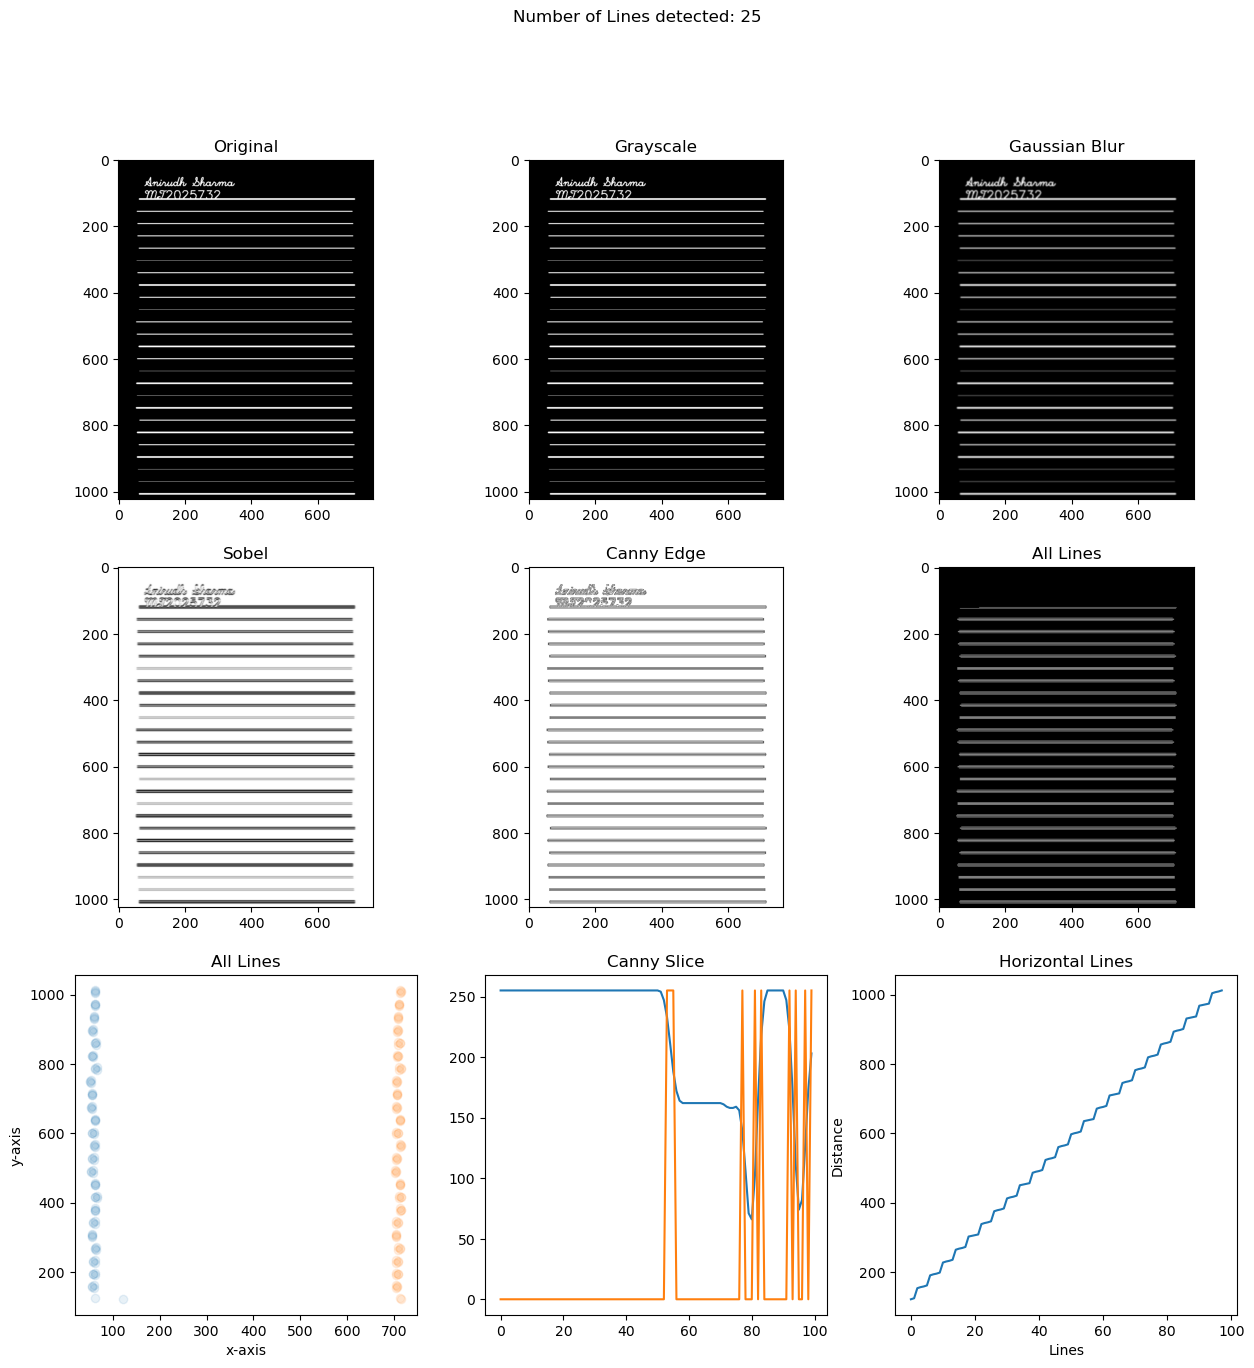

In [150]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()
plt.suptitle(f"Number of Lines detected: {len(merged_lines)}")

def plotas(ax, tle):
    ax.set_title(tle)
    return ax

ax = plotas(axs[0], "Original")
ax.imshow(image, cmap="gray_r")

ax = plotas(axs[1], "Grayscale")
ax.imshow(gray, cmap="gray_r")

ax = plotas(axs[2], "Gaussian Blur")
ax.imshow(blur, cmap="gray_r")

ax = plotas(axs[3], "Sobel")
ax.imshow(sobel, cmap="gray_r")

ax = plotas(axs[4], "Canny Edge")
ax.imshow(edges, cmap="gray_r")

ax = plotas(axs[5], "All Lines")
ax.imshow(all_lines_image, cmap="gray_r")

ax = plotas(axs[6], "All Lines")
ax.scatter([line[0][0] for line in lines], [line[0][1] for line in lines], alpha=0.1)
ax.scatter([line[0][2] for line in lines], [line[0][3] for line in lines], alpha=0.1)
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")

ax = plotas(axs[7], "Canny Slice")
ax.plot(blur[:100, 100])
ax.plot(edges[:100, 100])

ax = plotas(axs[8], "Horizontal Lines")
ax.plot([x[0] for x in horizontal_lines])
ax.set_xlabel("Lines")
ax.set_ylabel("Distance")

plt.show()

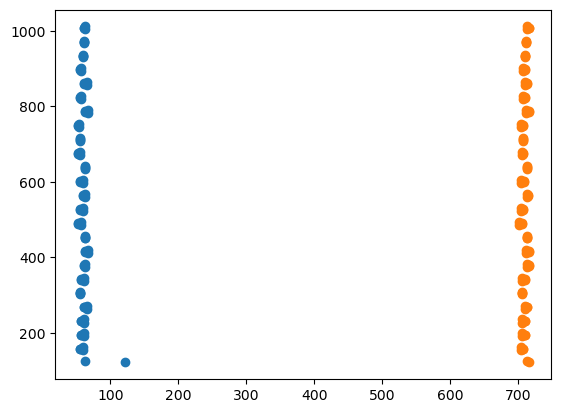

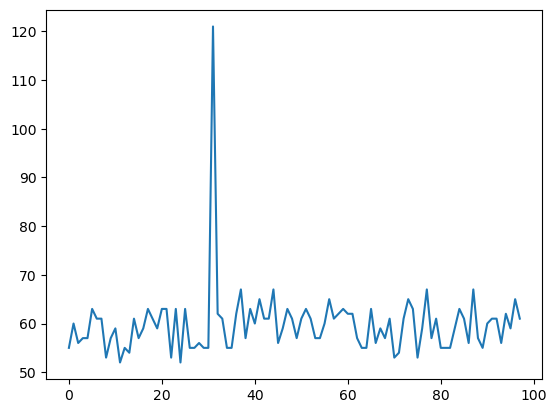

In [124]:
plt.plot([l[0][0] for l in useful_lines])

[np.int32(55),
 np.int32(60),
 np.int32(56),
 np.int32(57),
 np.int32(57),
 np.int32(63),
 np.int32(61),
 np.int32(61),
 np.int32(53),
 np.int32(57),
 np.int32(59),
 np.int32(52),
 np.int32(55),
 np.int32(54),
 np.int32(61),
 np.int32(57),
 np.int32(59),
 np.int32(63),
 np.int32(61),
 np.int32(59),
 np.int32(63),
 np.int32(63),
 np.int32(53),
 np.int32(63),
 np.int32(52),
 np.int32(63),
 np.int32(55),
 np.int32(55),
 np.int32(56),
 np.int32(55),
 np.int32(55),
 np.int32(121),
 np.int32(62),
 np.int32(61),
 np.int32(55),
 np.int32(55),
 np.int32(62),
 np.int32(67),
 np.int32(57),
 np.int32(63),
 np.int32(60),
 np.int32(65),
 np.int32(61),
 np.int32(61),
 np.int32(67),
 np.int32(56),
 np.int32(59),
 np.int32(63),
 np.int32(61),
 np.int32(57),
 np.int32(61),
 np.int32(63),
 np.int32(61),
 np.int32(57),
 np.int32(57),
 np.int32(60),
 np.int32(65),
 np.int32(61),
 np.int32(62),
 np.int32(63),
 np.int32(62),
 np.int32(62),
 np.int32(57),
 np.int32(55),
 np.int32(55),
 np.int32(63),
 np.int32

In [126]:
useful_lines_ang.shape

AttributeError: 'list' object has no attribute 'shape'

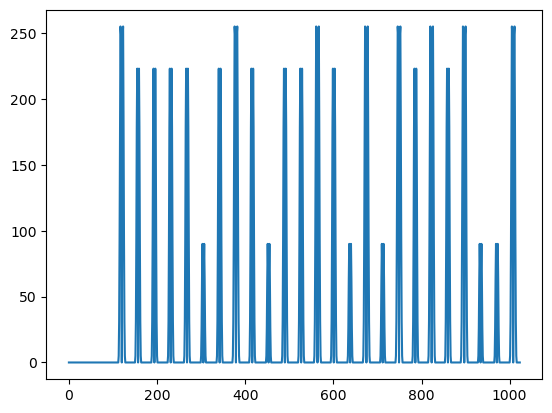

In [97]:
# Lines between 255 and 75ish
plt.plot(sobel[:, image.shape[1] // 2])

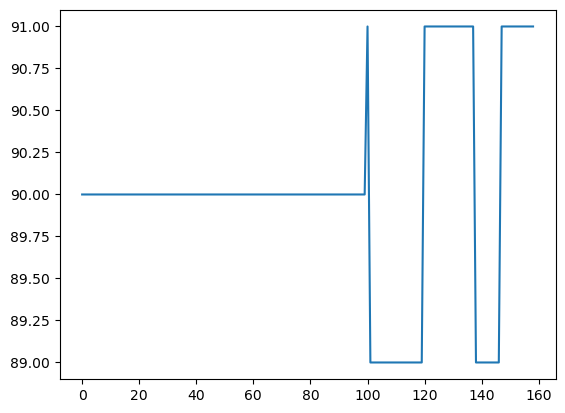

In [105]:
plt.plot(np.rad2deg(lines[:, 0, 1]))

In [107]:
lines.shape

(159, 1, 2)

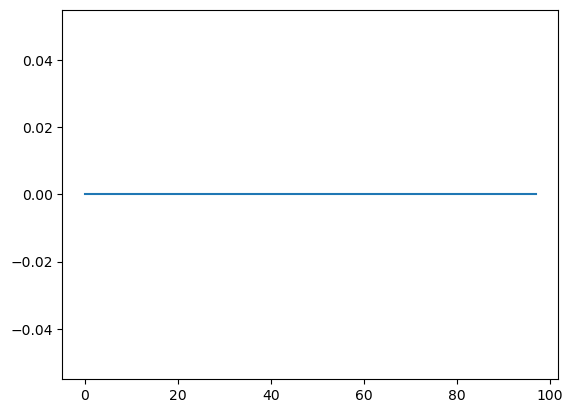

In [128]:
plt.plot(np.rad2deg([x[1] for x in useful_lines_ang]))

In [90]:
sobel.max()

np.uint8(255)

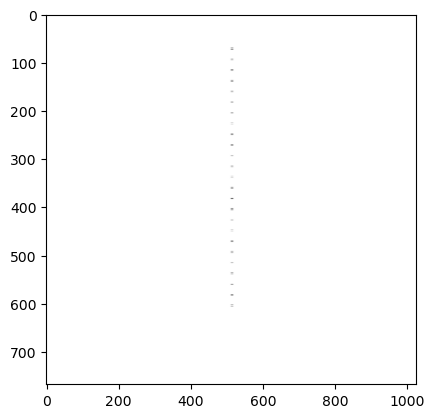

In [62]:
plt.imshow(parameter_space, aspect=image.shape[0] / image.shape[1], cmap="gray_r")

In [35]:
np.hypot(*image.shape)

np.float64(1280.0)

In [36]:
image.shape

(1024, 768)

In [47]:
lines[:, 0, 1].max(), lines[:, 0, 1].min()

(np.float32(1.5707964), np.float32(1.5707964))

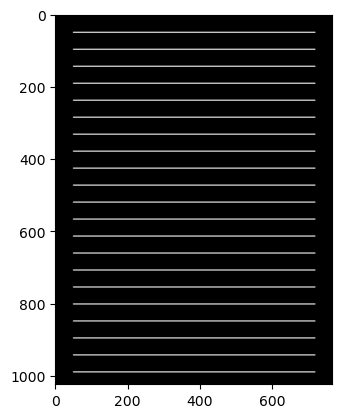

In [17]:
plt.imshow(image, cmap="gray_r")